# Stream Plot Example
Import Continuous Data into Python  
Plot a single channel of data with various filtering schemes  
Good for first-pass visualization of streamed data  
Combine streaming data and epocs in one plot

In [1]:
# special call that tells notebook to show matlplotlib figures inline
%matplotlib inline

import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # fundamental package for scientific computing, handles arrays and math

# import the primary functions from the tdt library only
from tdt import read_block, download_demo_data

## Importing the Data
This example uses our [example data sets](https://www.tdt.com/files/examples/TDTExampleData.zip). To import your own data, replace BLOCK_PATH with the full path to your own data block.

In Synapse, you can find the block path in the database. Go to Menu > History. Find your block, then Right-Click > Copy path to clipboard.

In [2]:
download_demo_data()
BLOCK_PATH = 'data/Algernon-180308-130351'

demo data ready


Now read channel 1 from all stream data into a Python structure called 'data'

In [3]:
data = read_block(BLOCK_PATH, evtype=['streams', 'epocs'], channel=1)

read from t=0s to t=61.23s


And that's it! Your data is now in Python. The rest of the code is a simple plotting example.
## Stream Store Plotting
Let's create time vectors for each stream store for plotting in time.

In [4]:
time_Wav1 = np.linspace(1, len(data.streams.Wav1.data), len(data.streams.Wav1.data)) / data.streams.Wav1.fs
time_LFP1 = np.linspace(1, len(data.streams.LFP1.data), len(data.streams.LFP1.data)) / data.streams.LFP1.fs
time_pNe1 = np.linspace(1, len(data.streams.pNe1.data), len(data.streams.pNe1.data)) / data.streams.pNe1.fs

Plot five seconds of data from each store

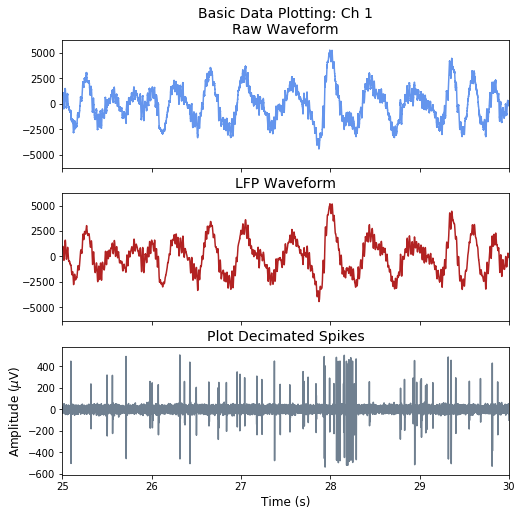

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex=True)

ax1.plot(time_Wav1, data.streams.Wav1.data*1e6, color='cornflowerblue')
ax1.set_title('Basic Data Plotting: Ch 1\nRaw Waveform', fontsize=14)

ax2.plot(time_LFP1, data.streams.LFP1.data*1e6, color='firebrick')
ax2.set_title('LFP Waveform', fontsize=14)

ax3.plot(time_pNe1, data.streams.pNe1.data, color='slategray')
ax3.set_title('Plot Decimated Spikes', fontsize=14)

ax3.set_xlabel('Time (s)', fontsize=12)
ax3.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

ax1.set_xlim(25, 30)

plt.show()

## Epoc Events
Generate continuous time series for epoc data using epoc timestamps

In [6]:
# StimSync epoc event
STIM_SYNC = 'PC0_'
pc0_on = data.epocs[STIM_SYNC].onset
pc0_off = data.epocs[STIM_SYNC].offset
pc0_x = np.reshape(np.kron([pc0_on, pc0_off], np.array([[1], [1]])).T, [1, -1])[0]

Make a time series waveform of epoc values and plot them.

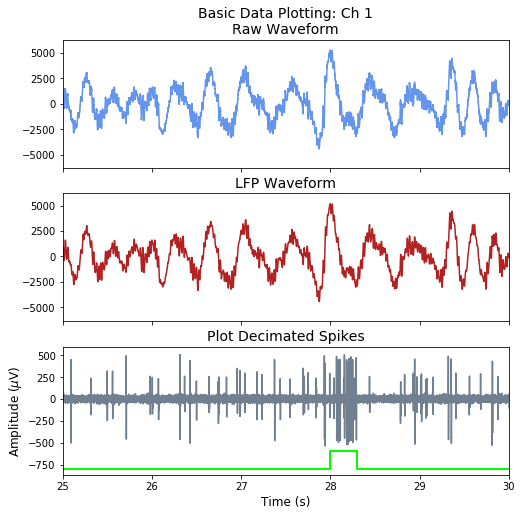

In [7]:
sz = len(pc0_on)
d = data.epocs[STIM_SYNC].data
pc0_y = np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1,-1])[0]

ax3.plot(pc0_x, 200*(pc0_y) - 800, color='lime', linewidth=2)
fig